In [1]:
import pandas as pd

file_path = "code-review-dataset-full.xlsx"

df = pd.read_excel(file_path)

In [6]:
# check how many rows of [is_toxic] is 1
print(f"Number of rows: {df.shape[0]}")
print(f"Number of rows with is_toxic = 1: {df[df['is_toxic'] == 1].shape[0]}")
print(f"Number of rows with is_toxic = 0: {df[df['is_toxic'] == 0].shape[0]}")

# check ratio in percentage
print(f"Ratio of is_toxic = 1: {df[df['is_toxic'] == 1].shape[0] / df.shape[0] * 100:.2f}%")
print(f"Ratio of is_toxic = 0: {df[df['is_toxic'] == 0].shape[0] / df.shape[0] * 100:.2f}%")


Number of rows: 19651
Number of rows with is_toxic = 1: 3757
Number of rows with is_toxic = 0: 15894
Ratio of is_toxic = 1: 19.12%
Ratio of is_toxic = 0: 80.88%


In [ ]:

import joblib
model = joblib.load('toxic_comment_classifier.pkl')


In [ ]:

print(df.isna().sum())
df_test = df.dropna(subset=['message', 'is_toxic'])
print(df_test.isna().sum())
print(f"Number of rows after dropna: {df_test.shape[0]}")

message     4
is_toxic    0
dtype: int64
message     0
is_toxic    0
dtype: int64
Number of rows after dropna: 19647


In [15]:
df_test['message'] = df_test['message'].astype(str)

/var/folders/qt/pskd0nhs263g4lfklj999gp40000gn/T/ipykernel_83323/3431224438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['message'] = df_test['message'].astype(str)


In [19]:
y_pred = model.predict(df_test['message'])
y_prob = model.predict_proba(df_test['message'])[:, 1]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score,roc_curve, auc, precision_recall_curve

y_true = df_test['is_toxic']

print(classification_report(y_true, y_pred))
print(f"confusion matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nROC AUC:", roc_auc_score(y_true, y_prob))
print("PR AUC:", average_precision_score(y_true, y_prob))


              precision    recall  f1-score   support

           0       0.90      0.78      0.83     15890
           1       0.40      0.64      0.49      3757

    accuracy                           0.75     19647
   macro avg       0.65      0.71      0.66     19647
weighted avg       0.81      0.75      0.77     19647

confusion matrix:
[[12356  3534]
 [ 1365  2392]]

ROC AUC: 0.7637664235068318
PR AUC: 0.4538816277548555


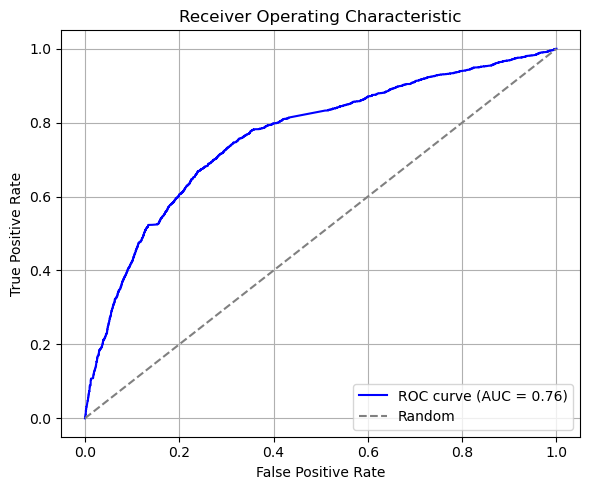

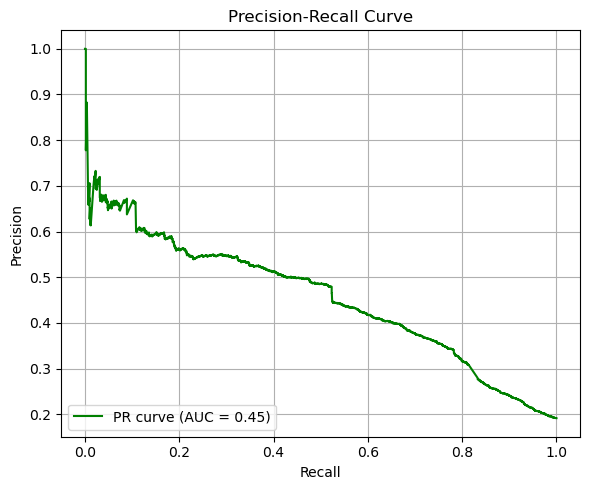

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# PR curve 

precision, recall, _ = precision_recall_curve(y_true, y_prob)
pr_auc = average_precision_score(y_true, y_prob)
# plot PR curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.2f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()

